## Crop MRC files

This notebook is used to crop a raw MRC file which contains data organized in Z-dir-phase-Y-X order. 

In [1]:
import os
import mrc as Mrc
import napari
from tnia.plotting.projections import show_xyz_max

In [10]:
input_path = r'D:\Janelia\Data 2024-06-30\488nm RPE-1 cell 2 2_20240626_165005  Fail zcrop experiment\not cropped'
output_path = r'D:\Janelia\Data 2024-06-30\488nm RPE-1 cell 2 2_20240626_165005  Fail zcrop experiment\cropped'
base_name = '488 nm 5 phases 0.81 NA React_All Linear SIM_cam1_1'
input_name = os.path.join(input_path, base_name+'.mrc')

if not os.path.exists(output_path):
    os.makedirs(output_path)

mrc = Mrc.Mrc(input_name)
mrc_data = mrc.data

boxes_layer = None

ndirs = 3
nphases = 5

n_slices_per_z = ndirs*nphases
z_crop_n_start = 5
z_crop_n_end = 3
crop_xy_with_napari = False

## Optionally use napari to choose an XY ROI

In [11]:
if crop_xy_with_napari:
    viewer = napari.Viewer()

    viewer.add_image(mrc_data, name='mrc_data')

    boxes_layer = viewer.add_shapes(
                name="Label box",
                face_color="transparent",
                edge_color="blue",
                edge_width=7,
            )

no boxes layer using entire image


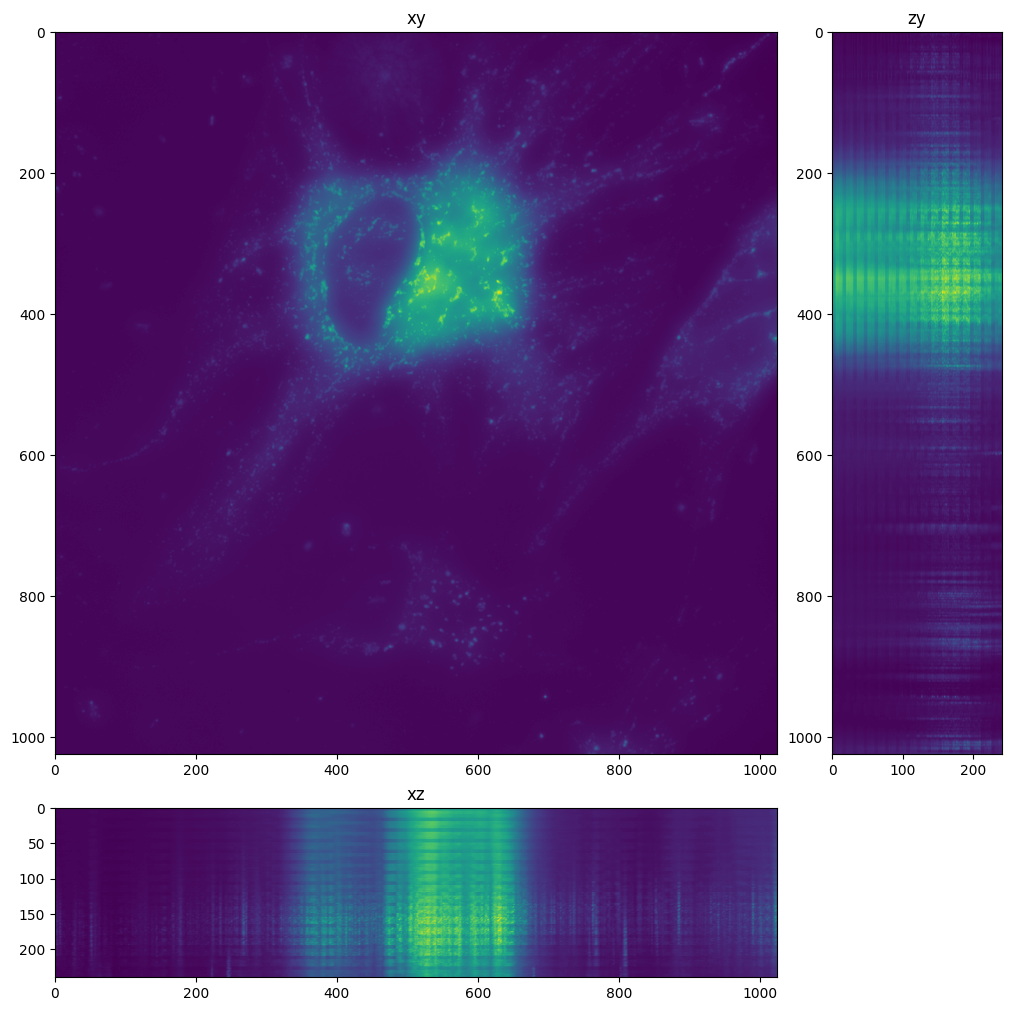

In [12]:
import matplotlib.pyplot as plt
import numpy as np

if boxes_layer is not None and len(boxes_layer.data) > 0:

    print(len(boxes_layer.data))

    for box in boxes_layer.data:
        print(box)
        starty=int(np.min(box[:,0]))
        endy=int(np.max(box[:,0]))
        startx=int(np.min(box[:,1]))
        endx=int(np.max(box[:,1]))

        if (endy-starty+1) % 2 == 0:
            endy -= 1
        if (endx-startx+1) % 2 == 0:
            endx -= 1
else:
    print('no boxes layer using entire image')
    starty = 0
    endy = mrc_data.shape[1]
    startx = 0
    endx = mrc_data.shape[2]

crop = mrc_data[:,starty:endy, startx:endx]

fig = show_xyz_max(crop)

image cropped to (240, 1024, 1024)
after z crop (120, 1024, 1024)


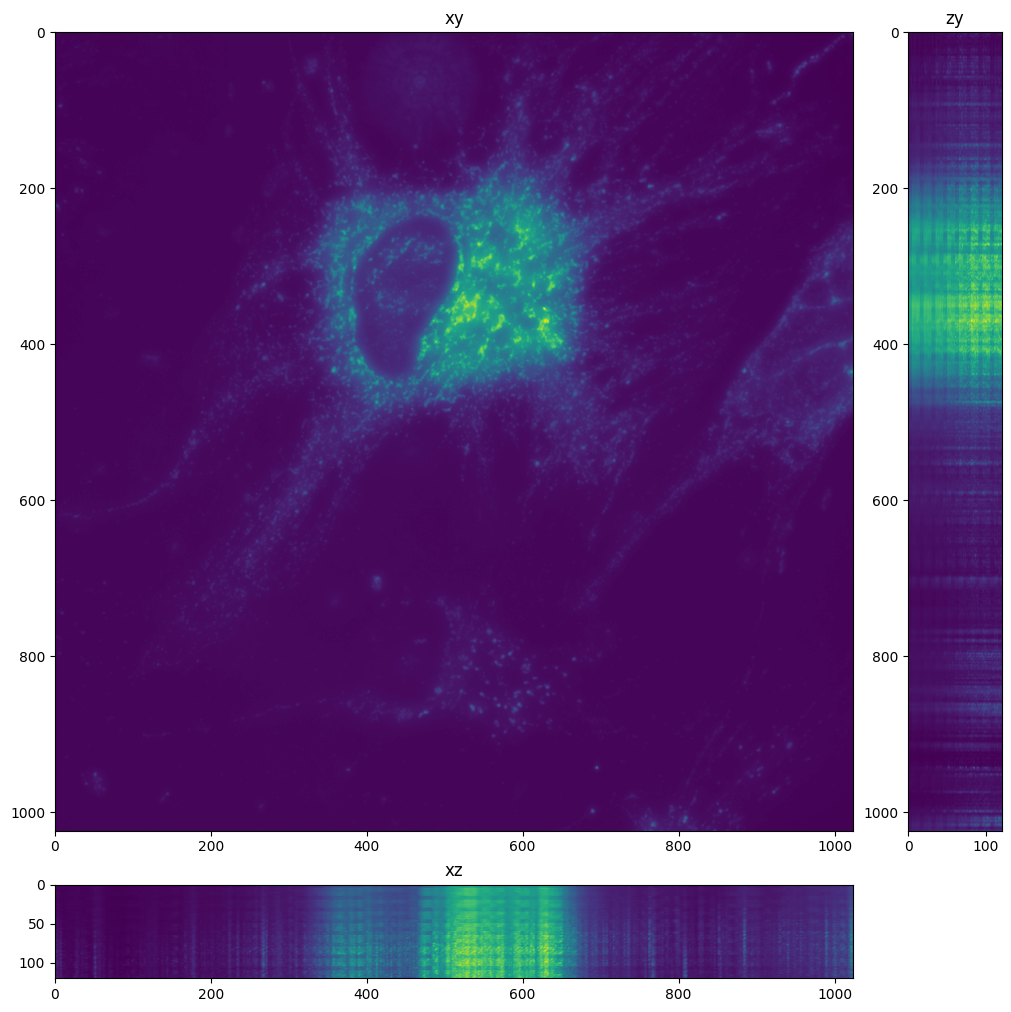

In [13]:
print('image cropped to',crop.shape)

z_crop = crop[z_crop_n_start*n_slices_per_z:crop.shape[0]-(z_crop_n_end*n_slices_per_z),:,:]
print('after z crop', z_crop.shape)
fig = show_xyz_max(z_crop)

In [14]:
z_crop = z_crop.astype(np.uint16)
output_name = os.path.join(output_path, base_name+'.mrc')
Mrc.save(z_crop, output_name, hdr=mrc.hdr, ifExists='overwrite')
